In [1]:
import pandas as pd


import datetime

import seaborn as sns

In [21]:
data = pd.read_csv("piscine-de-la-butte-aux-cailles.csv", header=None, names = ["affluence","timestamp"])

data["date"] = [datetime.datetime.fromtimestamp(timestamp) for timestamp in data["timestamp"]]
data["weekday"] = [date.strftime("%A") for date in data["date"]]
data["hour"] = [date.hour for date in data["date"]]
data

,affluence,timestamp,date,weekday,hour
0,80,1.746198e+09,2025-05-02 17:07:55.304506,Friday,17
1,80,1.746199e+09,2025-05-02 17:17:56.188071,Friday,17
2,100,1.746200e+09,2025-05-02 17:27:57.181772,Friday,17
3,5,1.746200e+09,2025-05-02 17:37:58.453444,Friday,17
4,5,1.746201e+09,2025-05-02 17:48:00.203301,Friday,17
...,...,...,...,...,...
186,55,1.746359e+09,2025-05-04 13:41:53.753696,Sunday,13
187,70,1.746359e+09,2025-05-04 13:48:20.333001,Sunday,13
188,65,1.746360e+09,2025-05-04 13:51:54.636617,Sunday,13
189,65,1.746360e+09,2025-05-04 13:58:21.602776,Sunday,13


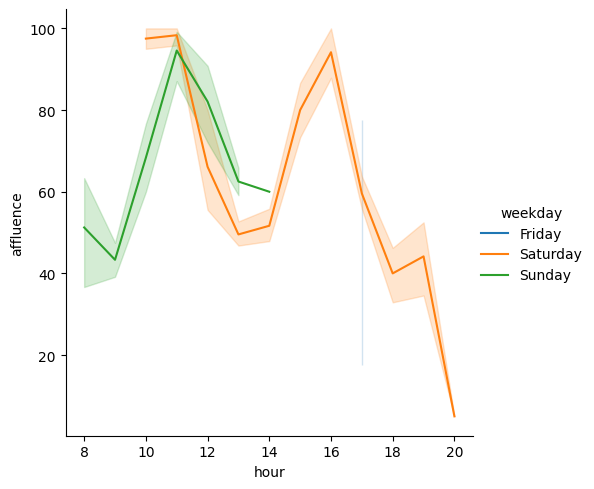

In [22]:
sns.relplot(data, y="affluence", x="hour", hue="weekday", kind="line", estimator="mean")